<a href="https://colab.research.google.com/github/iam-Mawannn/Python-Basic/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **"Penerapan Algoritma K-Means Clustering untuk Pengelompokan Fasilitas Kesehatan di Provinsi Aceh"**

In [ ]:
!pip install geopandas mapclassify

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import display

In [ ]:
# 1. Load Data Faskes
file_excel = "FASKES PROV ACEH.xlsx"
df = pd.read_excel(file_excel)

In [ ]:
# 2. Load Data Peta (Shapefile)
file_shp = "Peta Aceh.shp"
gdf_map = gpd.read_file(file_shp)

print("✅ Data berhasil diload!")
print(f"Jumlah Baris Data Faskes: {len(df)}")
print(f"Jumlah Wilayah di Peta: {len(gdf_map)}")
print("\nContoh Data Awal:")
display(df.head(24))

✅ Data berhasil diload!
Jumlah Baris Data Faskes: 23
Jumlah Wilayah di Peta: 23

Contoh Data Awal:


,KAB/ KOTA ACEH,Puskesmas,Puskesmas Pembantu,Polindes,Puskesmas Keliling (Mobil),Puskesmas Keliling (Perahu Bermotor),Ambulans
0,SIMEULUE,10,113,12,11,5,19
1,ACEH SINGKIL,11,29,36,9,2,4
2,ACEH SELATAN,23,54,56,22,0,24
3,ACEH TENGGARA,18,53,84,17,0,18
4,ACEH TIMUR,26,62,104,20,2,8
5,ACEH TENGAH,14,51,169,0,0,14
6,ACEH BARAT,13,31,48,21,0,0
7,ACEH BESAR,28,71,312,42,1,0
8,PIDIE,26,70,79,32,0,32
9,BIREUEN,18,45,198,18,0,6


In [ ]:
# --- SEL 2: CLEANING DATA ---

# Kolom yang akan dihitung
cols = ['Puskesmas', 'Puskesmas Pembantu', 'Polindes',
        'Puskesmas Keliling (Mobil)', 'Ambulans']

df_clean = df.copy()

# Loop untuk membersihkan setiap kolom angka
for col in cols:
    # Ubah jadi string -> ganti '-' jadi '0' -> ubah ke angka
    df_clean[col] = df_clean[col].astype(str).str.replace('-', '0')
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0)

print("✅ Data sudah bersih (Angka siap dihitung).")
display(df_clean.head(24))

✅ Data sudah bersih (Angka siap dihitung).


,KAB/ KOTA ACEH,Puskesmas,Puskesmas Pembantu,Polindes,Puskesmas Keliling (Mobil),Puskesmas Keliling (Perahu Bermotor),Ambulans
0,SIMEULUE,10,113,12,11,5,19
1,ACEH SINGKIL,11,29,36,9,2,4
2,ACEH SELATAN,23,54,56,22,0,24
3,ACEH TENGGARA,18,53,84,17,0,18
4,ACEH TIMUR,26,62,104,20,2,8
5,ACEH TENGAH,14,51,169,0,0,14
6,ACEH BARAT,13,31,48,21,0,0
7,ACEH BESAR,28,71,312,42,1,0
8,PIDIE,26,70,79,32,0,32
9,BIREUEN,18,45,198,18,0,6


In [ ]:
# --- SEL 3: K-MEANS CLUSTERING ---

# 1. Standarisasi Data (Agar angka besar tidak mendominasi)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_clean[cols])

# 2. Jalankan Algoritma K-Means (3 Cluster)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean['Cluster_ID'] = kmeans.fit_predict(features_scaled)

# 3. Beri Label (Padat, Cukup, Minim)
# Hitung total skor rata-rata untuk menentukan ranking cluster
cluster_means = df_clean.groupby('Cluster_ID')[cols].mean().sum(axis=1).sort_values(ascending=False)

# Mapping: Ranking 1=Padat, 2=Cukup, 3=Minim
label_mapping = {
    cluster_means.index[0]: 'Padat Fasilitas',
    cluster_means.index[1]: 'Cukup',
    cluster_means.index[2]: 'Minim'
}
df_clean['Kategori'] = df_clean['Cluster_ID'].map(label_mapping)

print("✅ Clustering Selesai!")
# Tampilkan hasil pengelompokan
display(df_clean[['KAB/ KOTA ACEH', 'Kategori', 'Puskesmas', 'Polindes']].head(10))

✅ Clustering Selesai!


,KAB/ KOTA ACEH,Kategori,Puskesmas,Polindes
0,SIMEULUE,Cukup,10,12
1,ACEH SINGKIL,Minim,11,36
2,ACEH SELATAN,Cukup,23,56
3,ACEH TENGGARA,Cukup,18,84
4,ACEH TIMUR,Cukup,26,104
5,ACEH TENGAH,Padat Fasilitas,14,169
6,ACEH BARAT,Minim,13,48
7,ACEH BESAR,Padat Fasilitas,28,312
8,PIDIE,Cukup,26,79
9,BIREUEN,Padat Fasilitas,18,198


In [ ]:
# --- BAGIAN 4: MENYAMAKAN NAMA & JOIN ---

# 1. Bersihkan Nama di Excel
# Pastikan nama kolom di Excel benar ('KAB/ KOTA ACEH')
df_clean['nama_join'] = df_clean['KAB/ KOTA ACEH'].astype(str).str.upper()
df_clean['nama_join'] = df_clean['nama_join'].str.replace('KABUPATEN', '').str.replace('KOTA', '').str.replace('KAB.', '').str.strip()

# 2. Bersihkan Nama di Peta (PERBAIKAN UTAMA DI SINI)
# Kita paksa pakai kolom 'NAME_2' (biasanya ini kolom Kabupaten di peta GADM)
# Jika error, coba ganti jadi 'KAB_KOTA' atau 'WADMKK'
target_col_shp = 'NAME_2'

# Cek apakah kolom ada
if target_col_shp not in gdf_map.columns:
    print(f"⚠️ Kolom '{target_col_shp}' tidak ditemukan di Peta!")
    print("Daftar Kolom di Peta:", gdf_map.columns)
    # Ambil kolom alternatif jika NAME_2 tidak ada
    target_col_shp = gdf_map.columns[0] # Fallback (bisa diedit manual)
else:
    print(f"✅ Menggunakan kolom '{target_col_shp}' dari Peta sebagai Nama Kabupaten.")

gdf_map['nama_join'] = gdf_map[target_col_shp].astype(str).str.upper()
gdf_map['nama_join'] = gdf_map['nama_join'].str.replace('KABUPATEN', '').str.replace('KOTA', '').str.replace('KAB.', '').str.replace('CITY', '').str.strip()

# 3. Kamus Koreksi (Perbaiki ejaan yang sering beda)
koreksi_nama = {
    'BENERMERIAH': 'BENER MERIAH',
    'LHOKSEUMAWE': 'LHOK SEUMAWE',
    'BANDAACEH': 'BANDA ACEH',
    'ACEH BESAR': 'ACEH BESAR',
    'PIDIE JAYA': 'PIDIE JAYA'
}
gdf_map['nama_join'] = gdf_map['nama_join'].replace(koreksi_nama)

# 4. Gabungkan (Join)
gdf_joined = gdf_map.merge(df_clean, on='nama_join', how='left')

# Isi data kosong
gdf_joined['Kategori'] = gdf_joined['Kategori'].fillna('Data Tidak Cocok')

# --- FITUR DEBUGGING (CEK ERROR) ---
print("\n--- HASIL PENCOCOKAN ---")
sukses = gdf_joined[gdf_joined['Kategori'] != 'Data Tidak Cocok']
gagal = gdf_joined[gdf_joined['Kategori'] == 'Data Tidak Cocok']

print(f"Berhasil dicocokkan: {len(sukses)} daerah")
print(f"Gagal dicocokkan   : {len(gagal)} daerah")

if len(gagal) > 0:
    print("\n⚠️ DAERAH BERIKUT GAGAL JOIN (CEK EJAANNYA):")
    # Tampilkan nama di Peta vs nama yang tersedia di Excel
    print("Nama di Peta yang gagal:", gagal['nama_join'].unique())
    print("\nBandingkan dengan Nama di Excel:", df_clean['nama_join'].unique())
else:
    print("\n✅ SEMPURNA! Semua daerah berhasil terhubung.")

✅ Menggunakan kolom 'NAME_2' dari Peta sebagai Nama Kabupaten.

--- HASIL PENCOCOKAN ---
Berhasil dicocokkan: 23 daerah
Gagal dicocokkan   : 0 daerah

✅ SEMPURNA! Semua daerah berhasil terhubung.


/tmp/ipython-input-1308810992.py:15: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf_joined.plot(


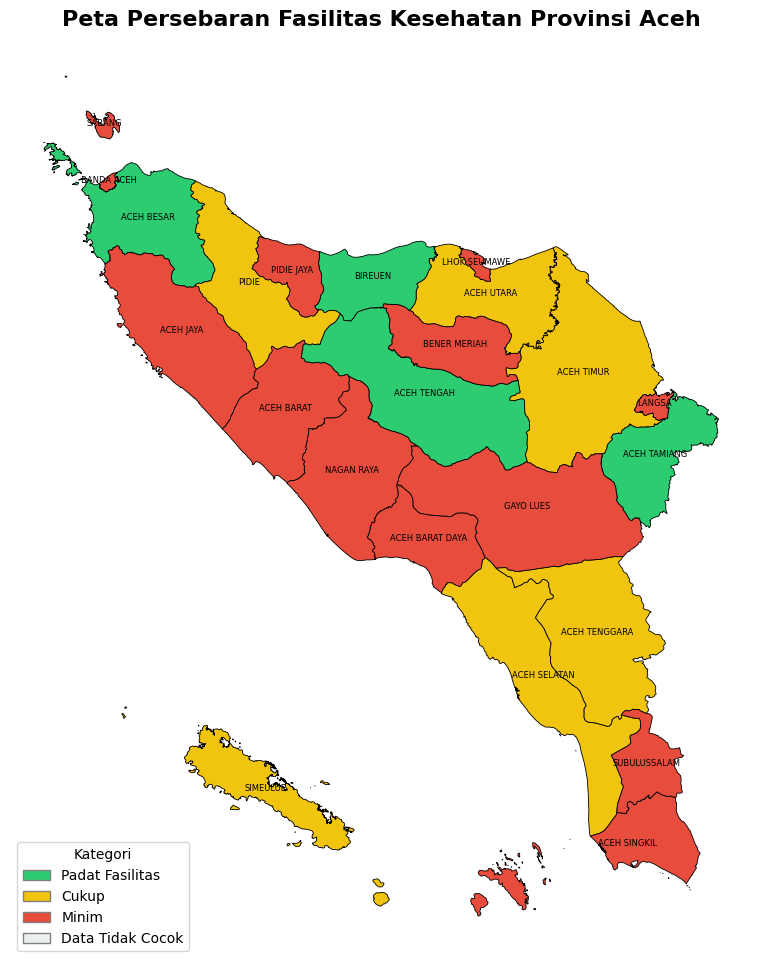

In [ ]:
# --- SEL 5: PLOT PETA ---
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Definisi Warna
warna = {
    'Padat Fasilitas': '#2ecc71', # Hijau
    'Cukup': '#f1c40f',           # Kuning
    'Minim': '#e74c3c',           # Merah
    'Data Tidak Cocok': '#ecf0f1' # Abu-abu
}

# Plot Peta
gdf_joined.plot(
    column='Kategori',
    color=gdf_joined['Kategori'].map(warna),
    linewidth=0.6,
    edgecolor='black',
    ax=ax
)

# Tambah Nama Daerah di Peta
for idx, row in gdf_joined.iterrows():
    if row['Kategori'] != 'Data Tidak Cocok':
        plt.annotate(text=row['nama_join'],
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', fontsize=6, color='black')

# Buat Legenda
elemen_legenda = [Patch(facecolor=warna[k], edgecolor='gray', label=k) for k in warna]
ax.legend(handles=elemen_legenda, loc='lower left', title="Kategori")

plt.title("Peta Persebaran Fasilitas Kesehatan Provinsi Aceh", fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()